# CARDIOVASCULAR DISEASE PREDICTION
The data set is available on Kaggle website https://www.kaggle.com/datasets/utkarshx27/heart-disease-diagnosis-dataset/data

Used classifiers 
1. K-Neighbors Classifier (KNN)
2. Decision Tree Classifier (DT)
3. Random Forest Classifier (RF)

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [62]:
df = pd.read_csv('E:\MSC\Second Year - Second Semester\ML\Assignment 2\Predicting-Heart-Disease-master\dataset_heart.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [64]:
df.nunique()

age                                      41
sex                                       2
chest pain type                           4
resting blood pressure                   47
serum cholestoral                       144
fasting blood sugar                       2
resting electrocardiographic results      3
max heart rate                           90
exercise induced angina                   2
oldpeak                                  39
ST segment                                3
major vessels                             4
thal                                      3
heart disease                             2
dtype: int64

In [65]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [66]:
numerical = ['age', 'resting blood pressure', 'serum cholestoral', 'max heart rate',
            'oldpeak']

In [67]:
def plots(df, x, y):
    grouped = df.groupby(y)
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 10))
    sns.histplot(df, x=x, kde=True, ax=axes[0])
    sns.histplot(df, x=x, hue=y, kde=True, ax=axes[1])
    sns.barplot(x=grouped[x].mean().index,
               y=grouped[x].mean(),ax=axes[2])
    for container in axes[2].containers:
        axes[2].bar_label(container, size=15, color='black')
        
    axes[3].pie(df[y].value_counts(), 
               labels=df[y].value_counts().index,
               autopct="%0.2f%%")
    plt.suptitle("{} histplot distribution, barplots grouped by {} and pie chart".format(x.capitalize(), y.capitalize()),
                size=20)
    plt.tight_layout()
    plt.show()

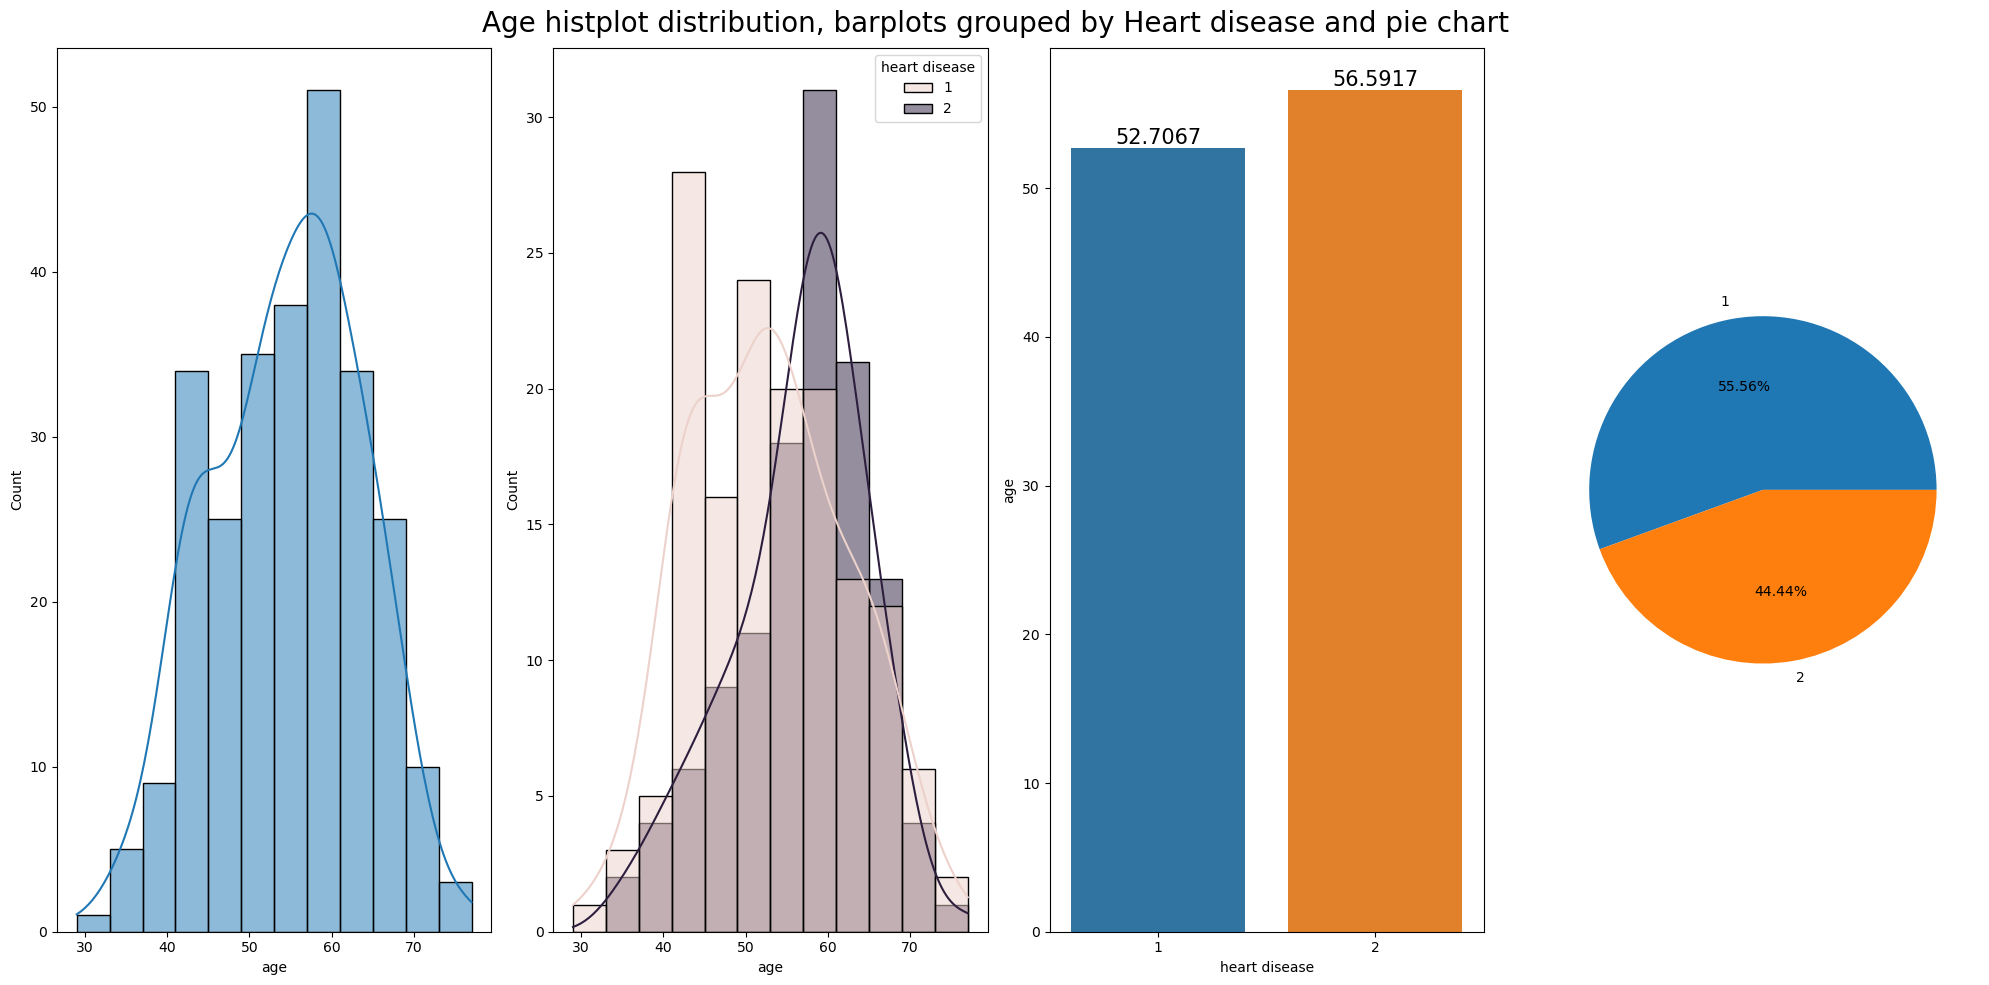

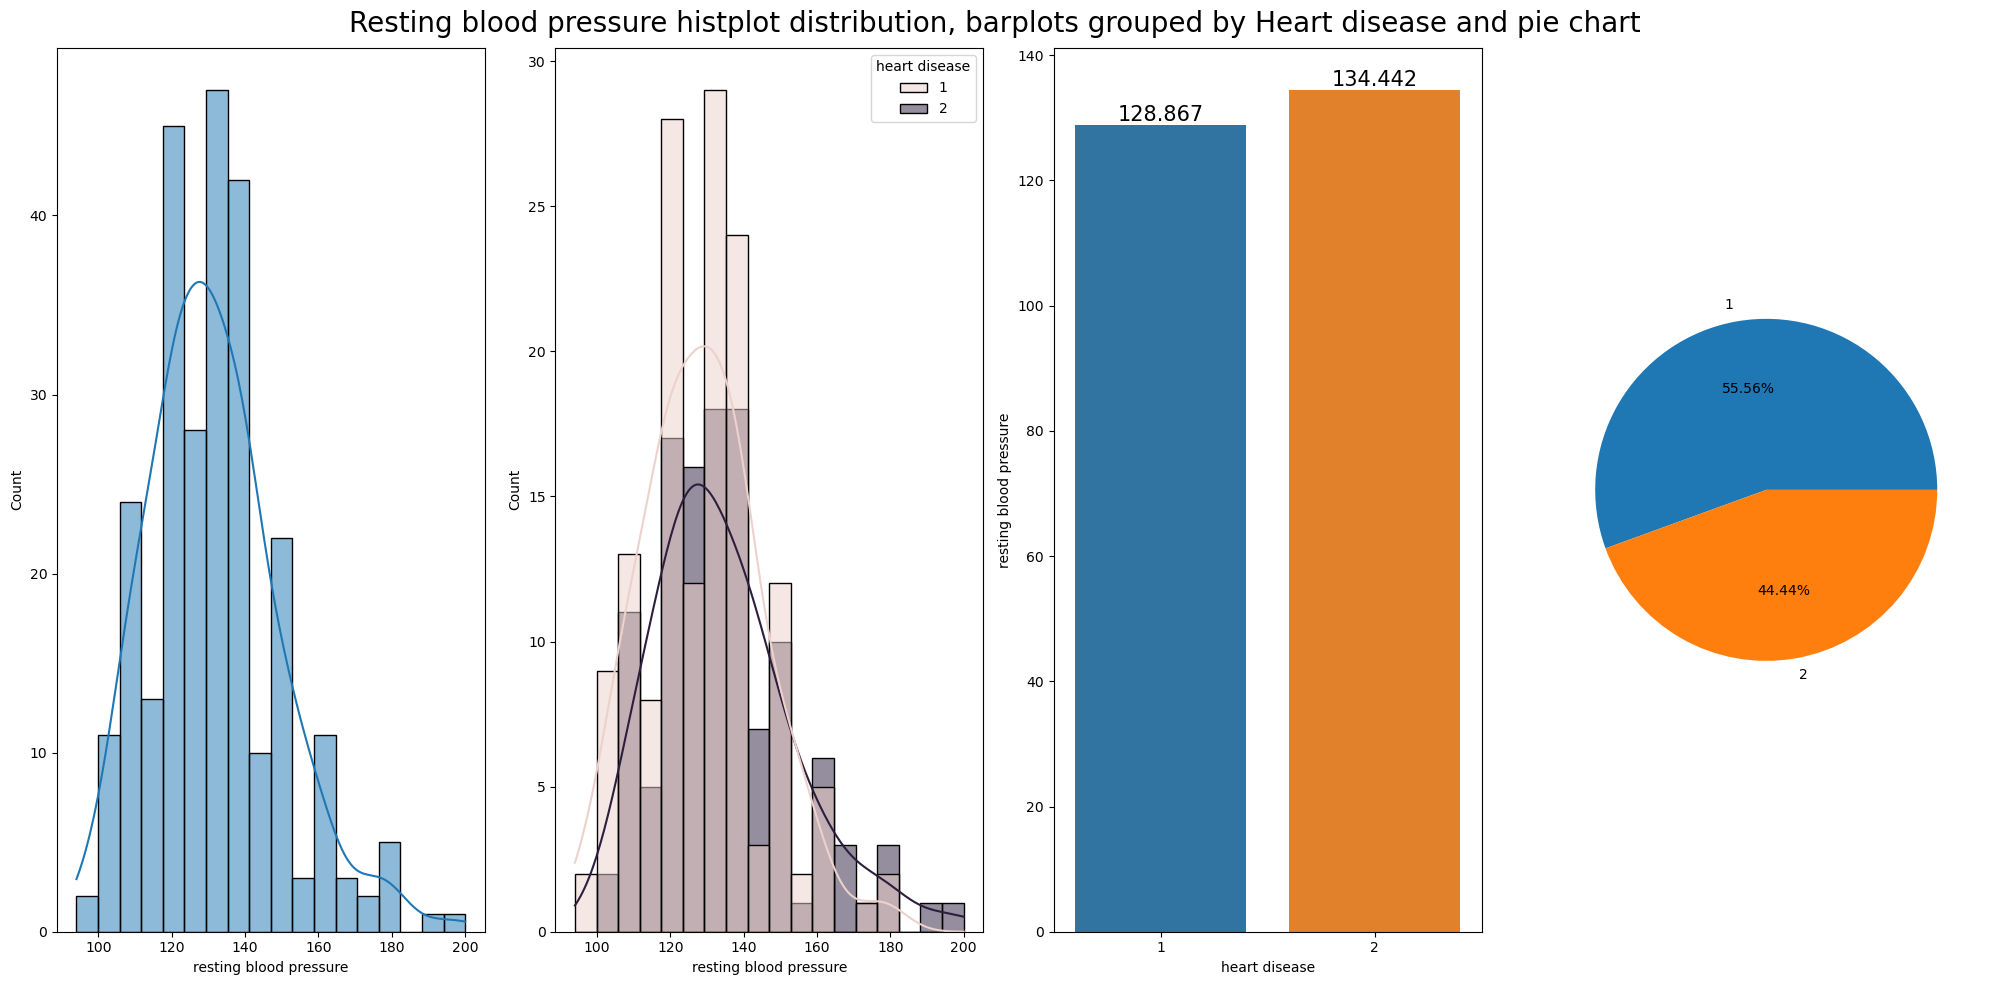

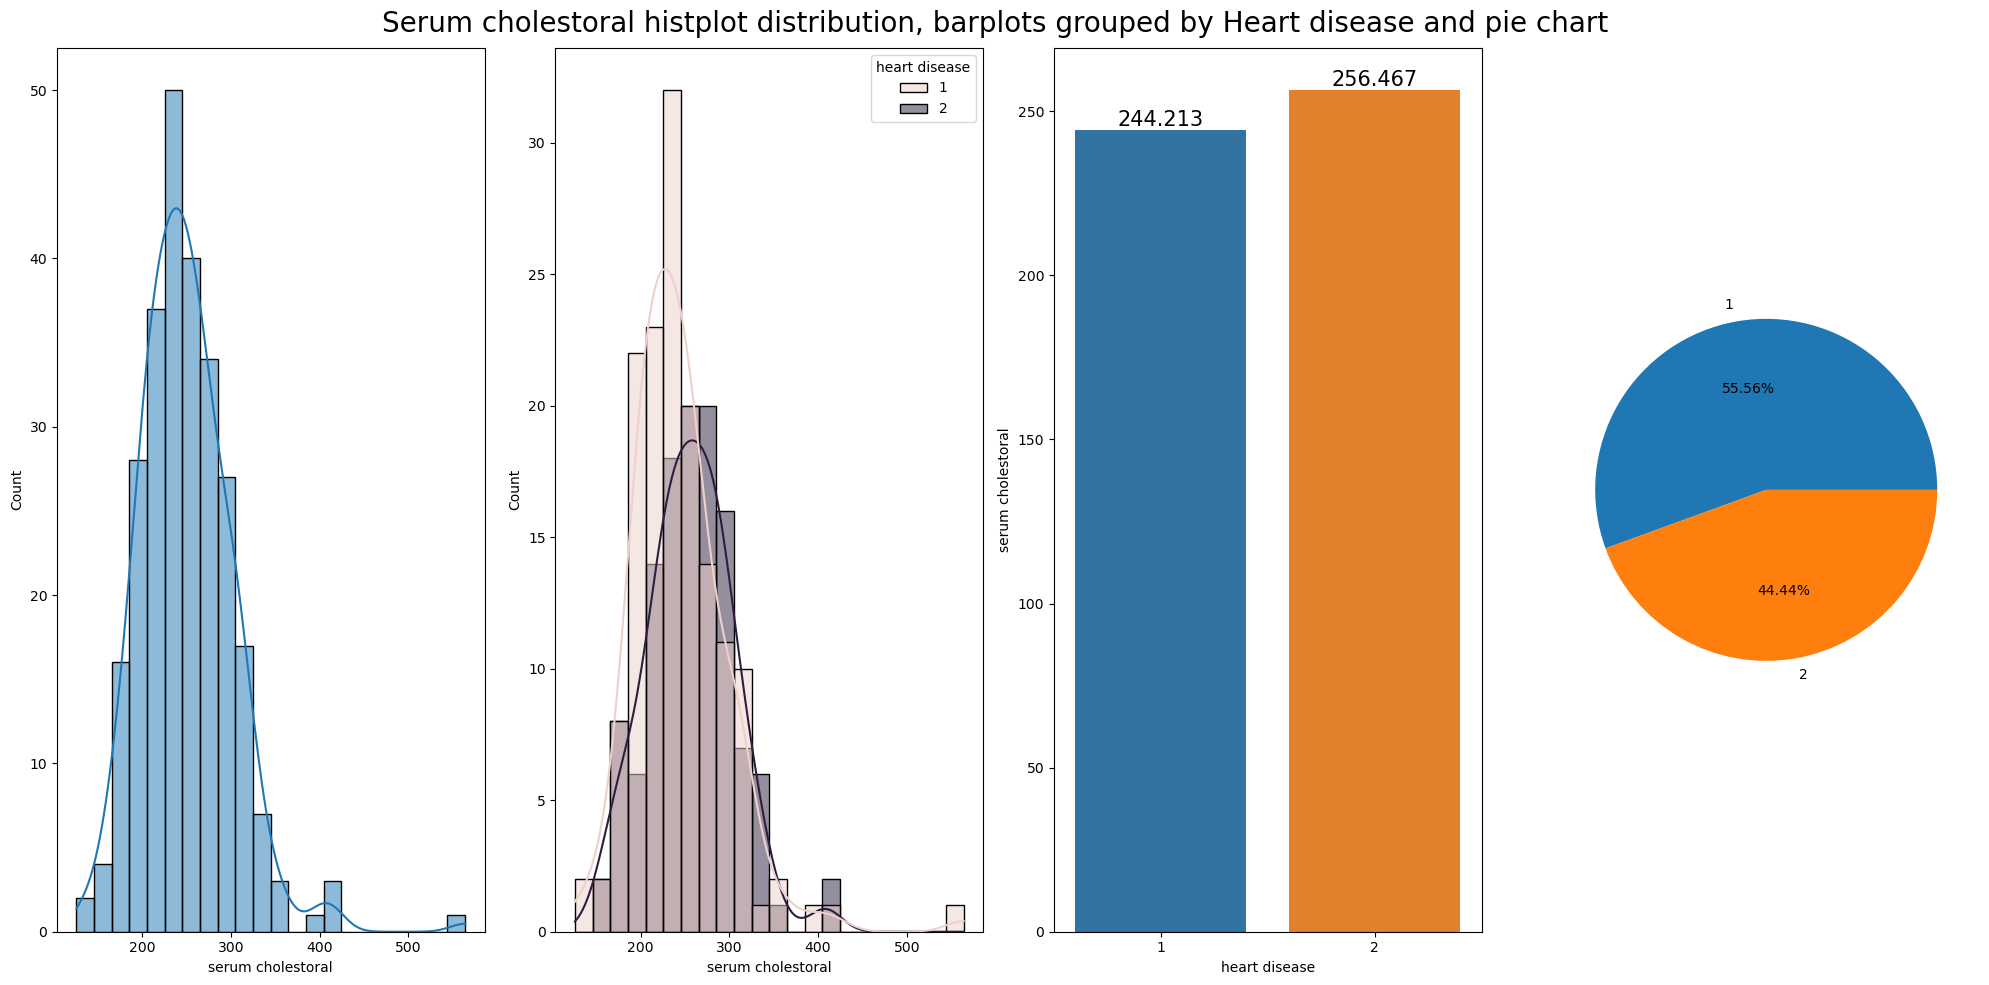

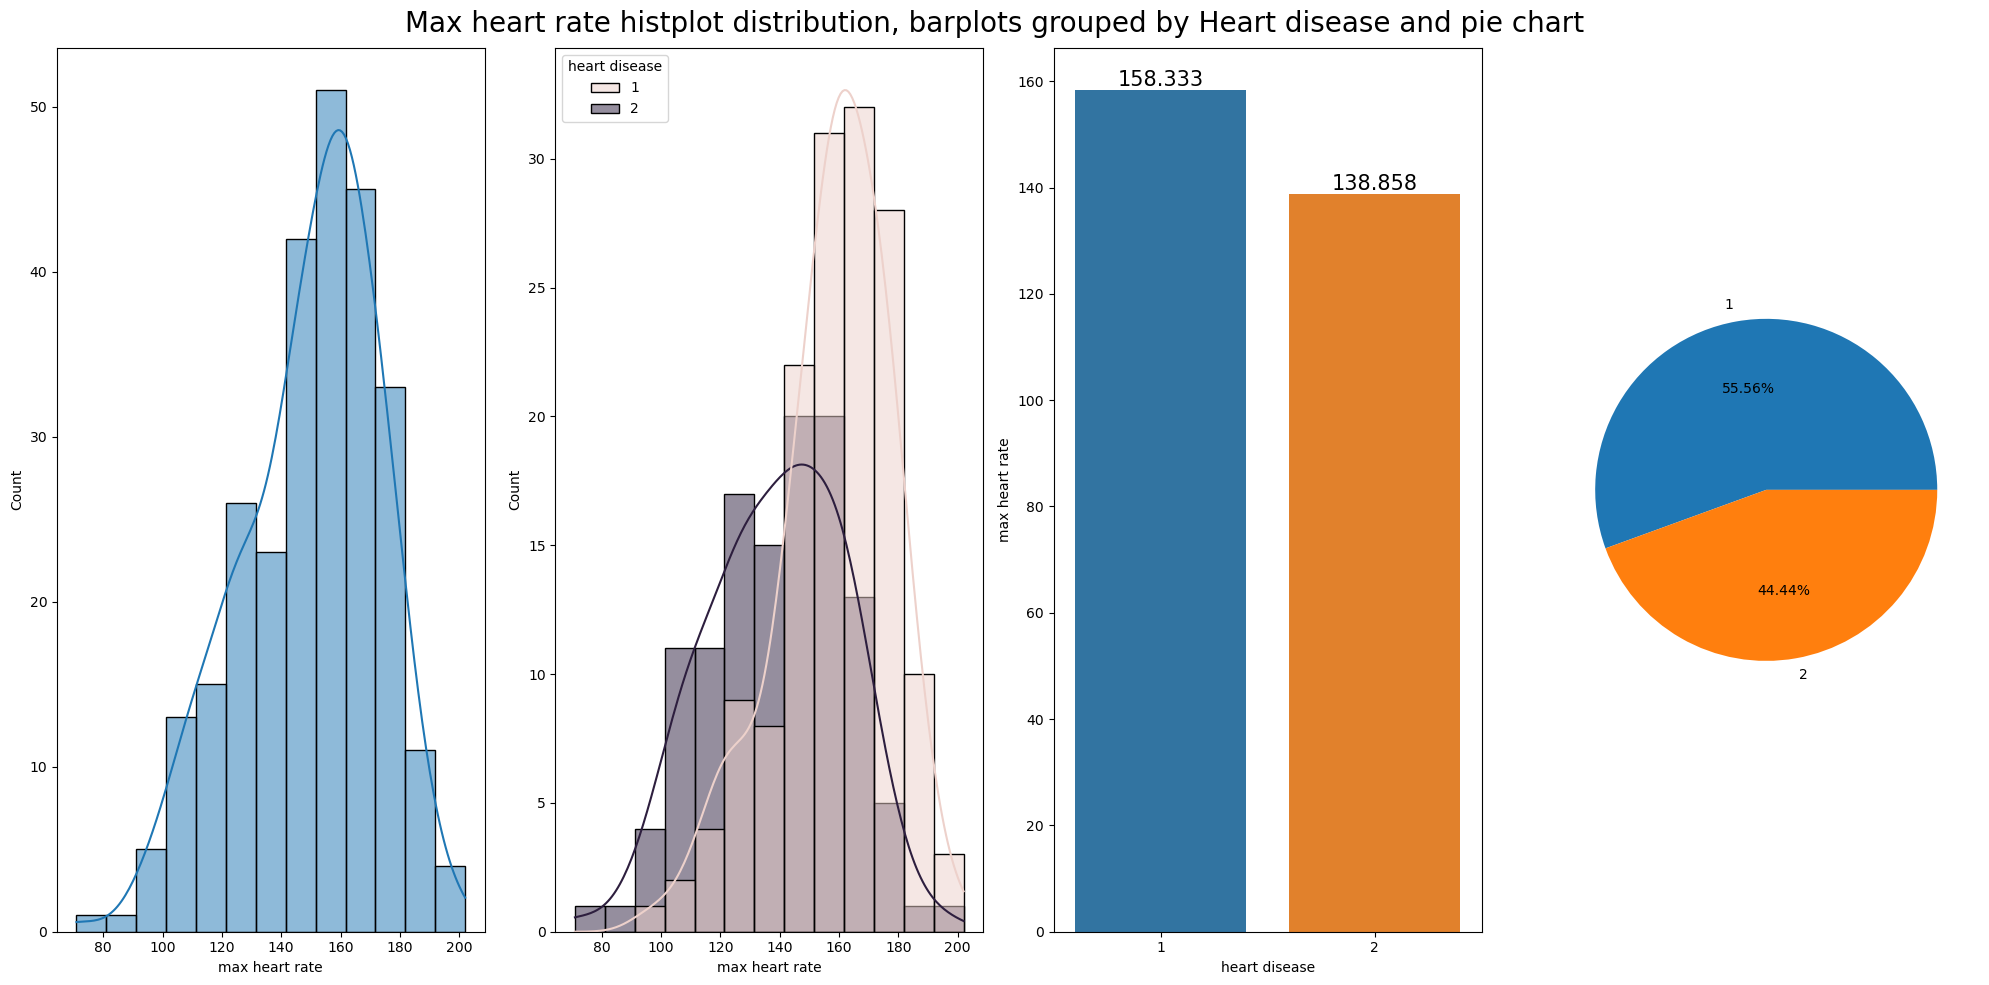

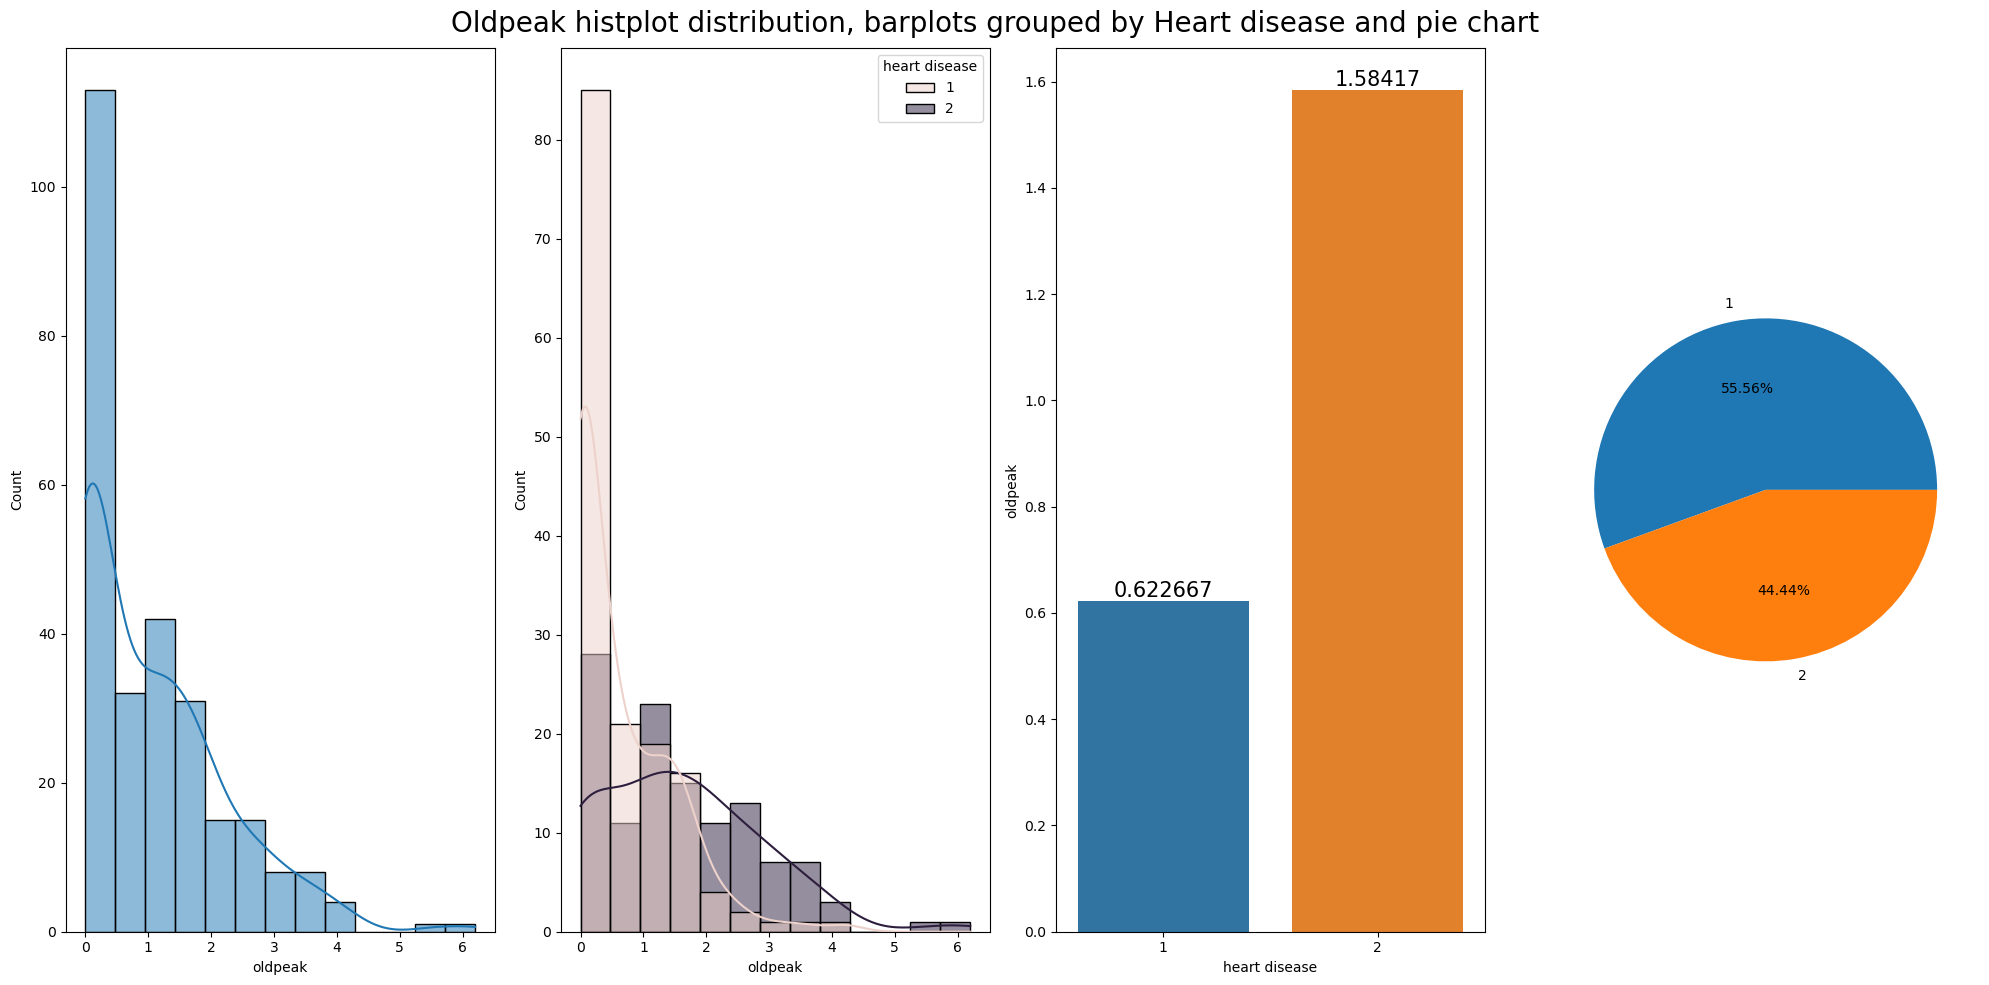

In [22]:
for i in numerical:
    plots(df, i, 'heart disease')

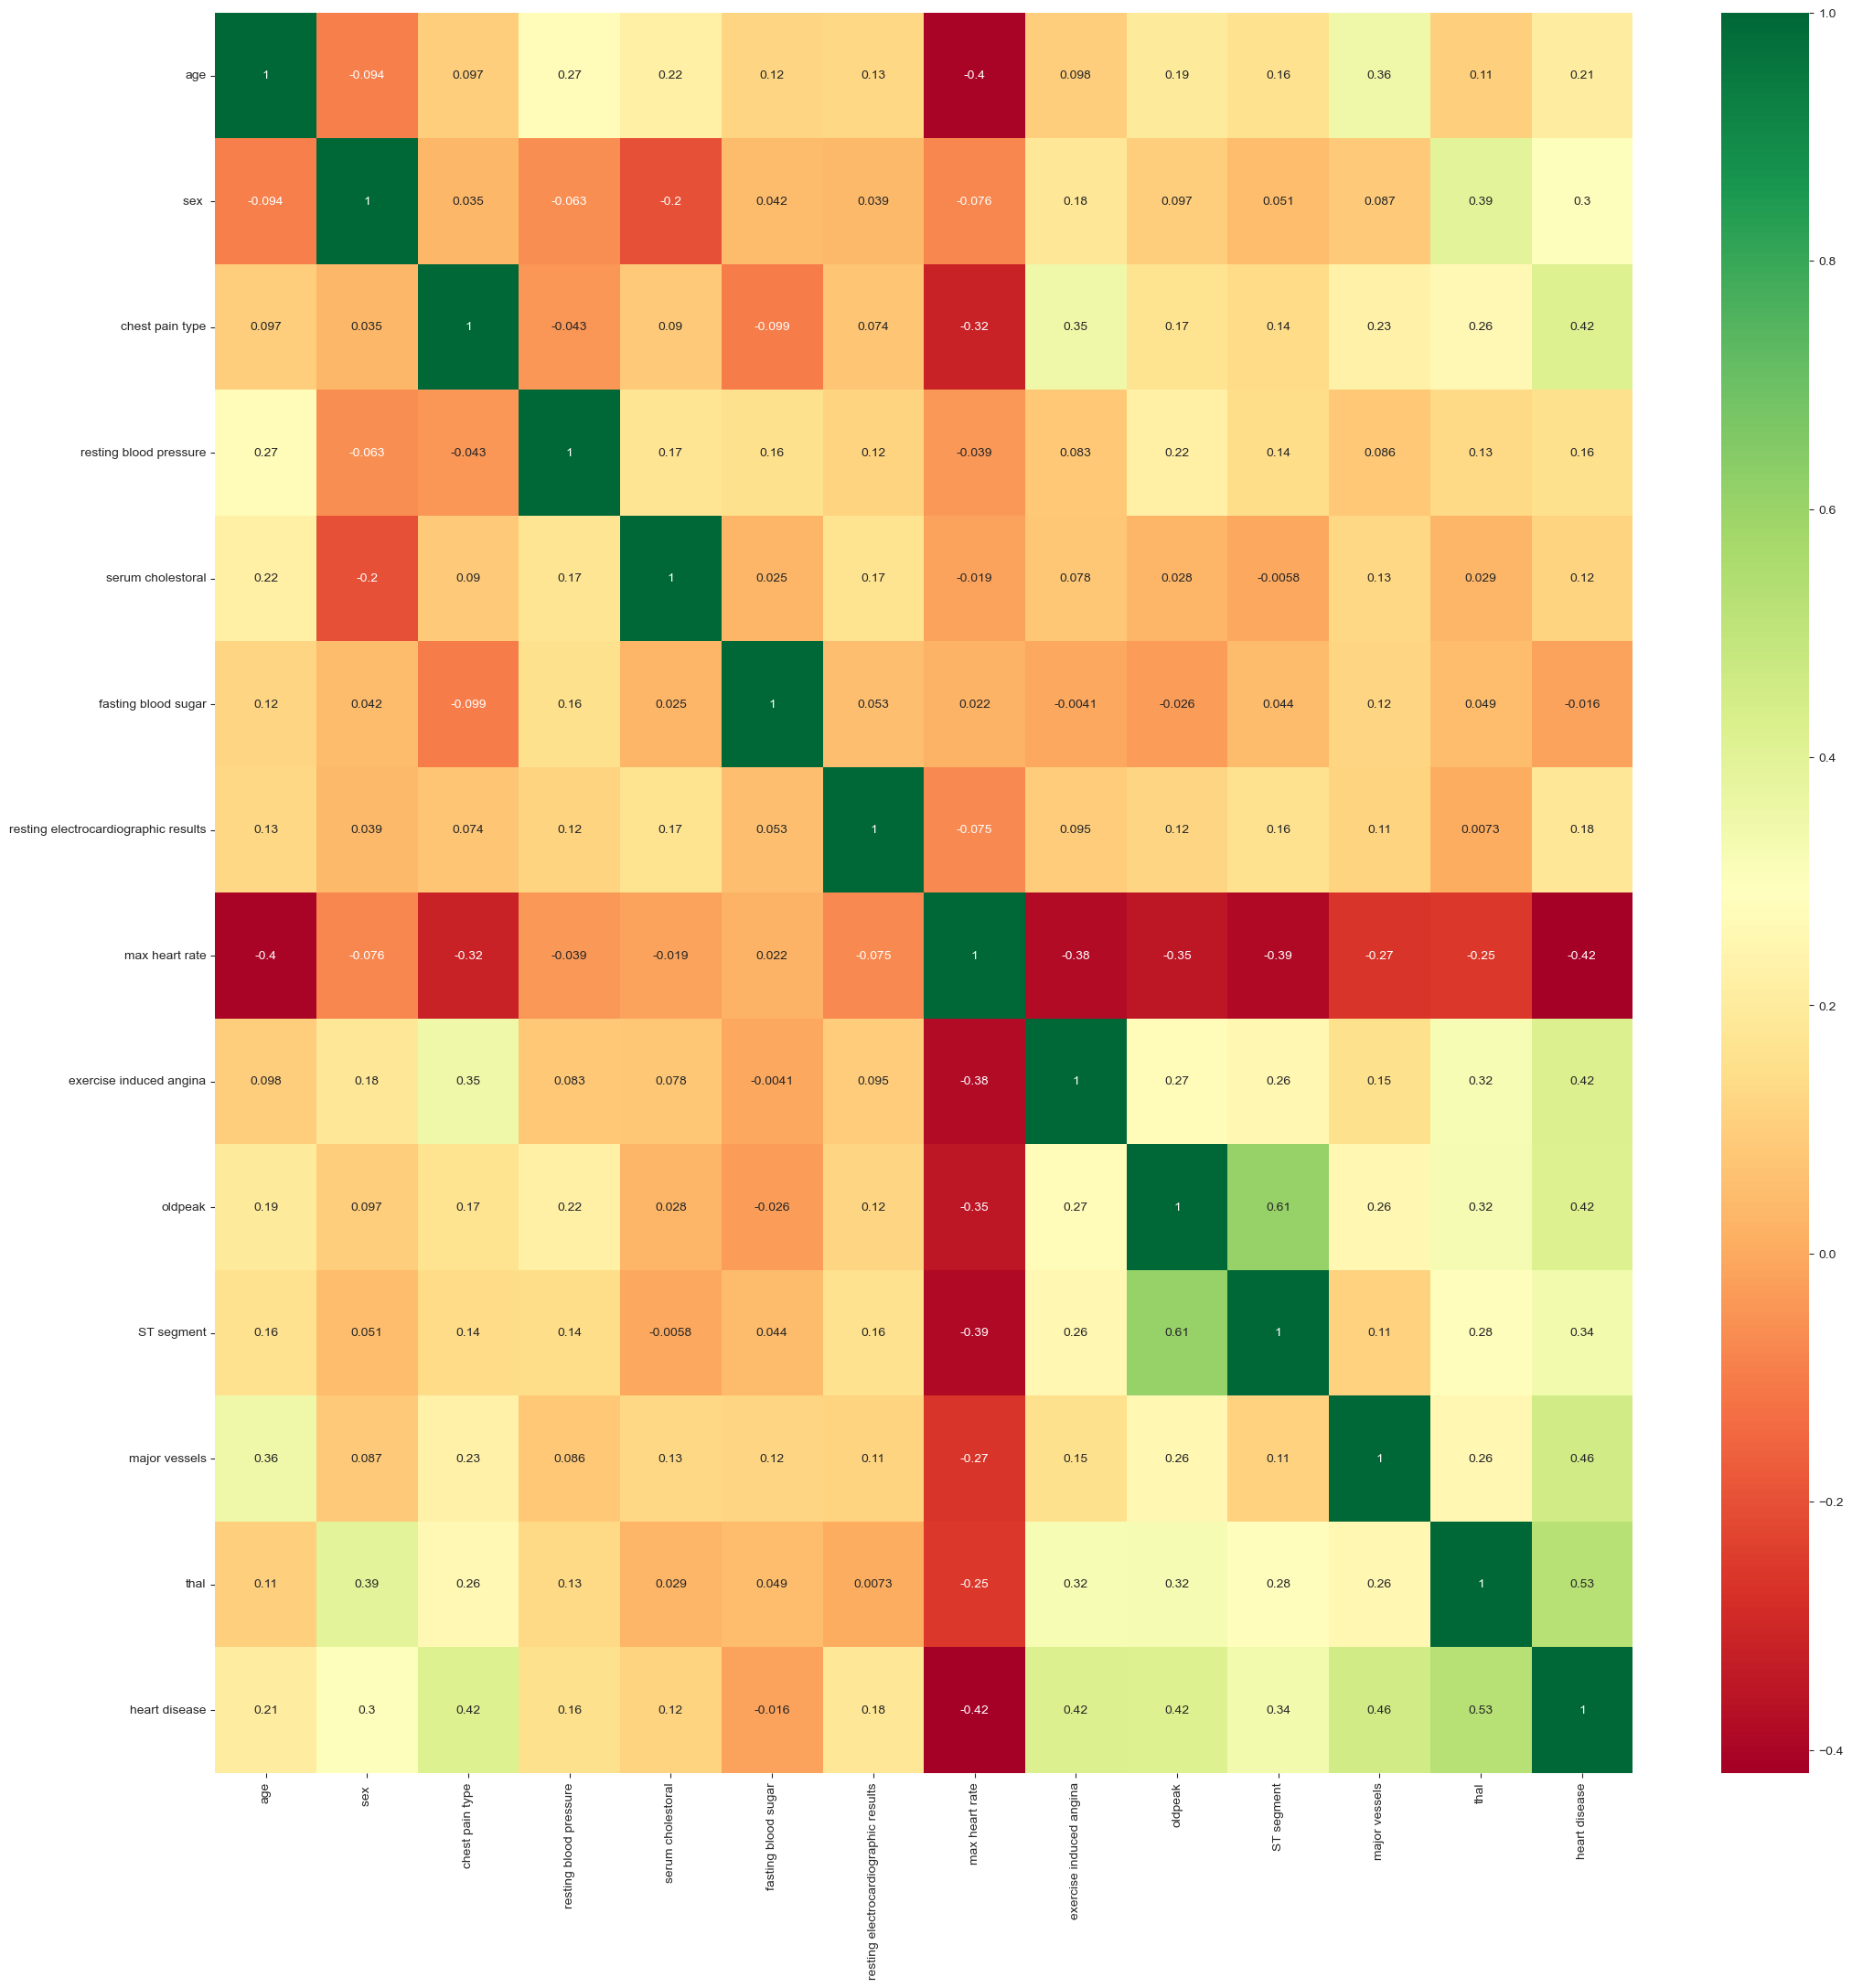

In [91]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

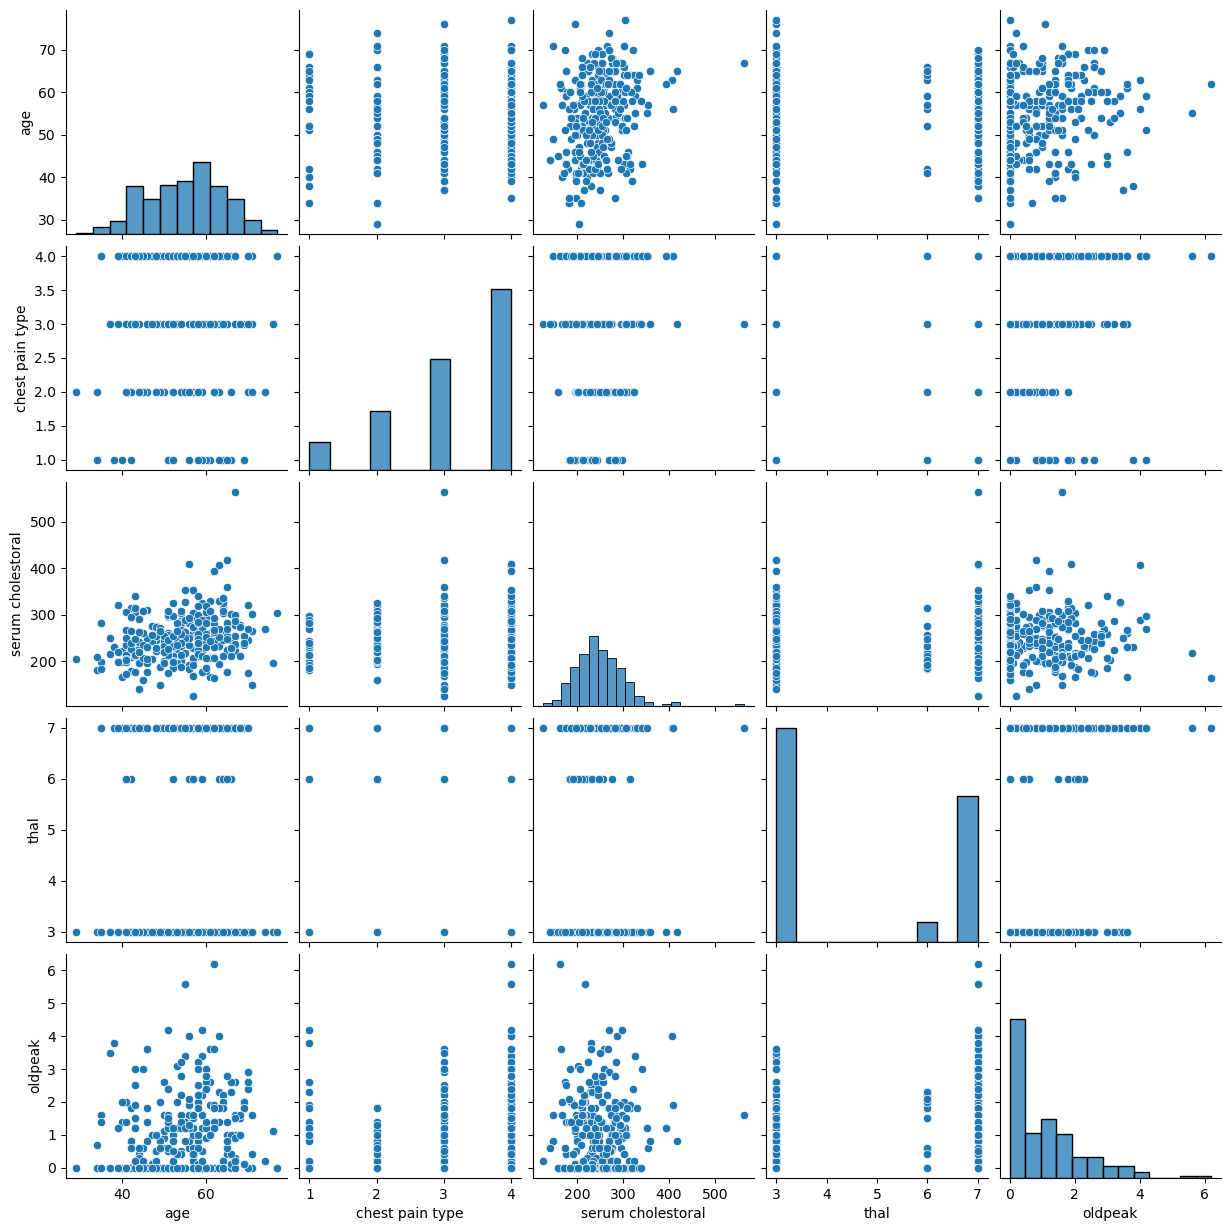

In [72]:
subData = df[['age','chest pain type','serum cholestoral','thal','oldpeak']]
sns.pairplot(subData)

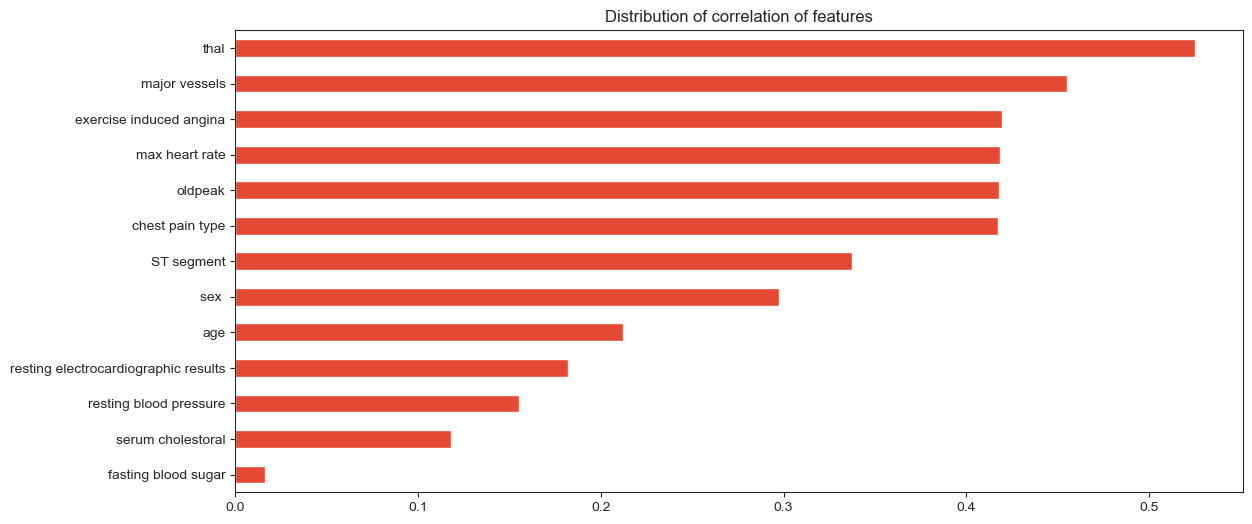

In [73]:
sns.set_style('ticks')
sns.set_palette('RdYlGn')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(corrmat['heart disease']).sort_values()[:-1].plot.barh()
plt.show()

In [74]:
X=df.drop('heart disease',axis=1)
y=df['heart disease']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

In [76]:
kn =KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(random_state=0)

In [77]:
kn.fit(X_train, y_train)   
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [78]:
y_pred = kn.predict(X_test)
print('KNN test accuracy', accuracy_score(y_test, y_pred ))

KNN test accuracy 0.7222222222222222


In [79]:
y_pred = rf.predict(X_test)
print('RF test accuracy', accuracy_score(y_test, y_pred ))

RF test accuracy 0.8333333333333334


In [80]:
y_pred = dt.predict(X_test)
print('DT test accuracy', accuracy_score(y_test, y_pred ))

DT test accuracy 0.7592592592592593


In [81]:
from sklearn.metrics import classification_report

def plot_classification_report(y_train, y_pred1, y_test, y_pred2, c_name):
    print("-"*25,c_name,"(TRAIN SET)","-"*25)
    print(classification_report(y_train, y_pred1))
    print("-"*25,c_name,"(Test SET)","-"*25)
    print(classification_report(y_test, y_pred2))

In [82]:
c_name= "KNN"
plot_classification_report(y_train, kn.predict(X_train), y_test, kn.predict(X_test), c_name)

------------------------- KNN (TRAIN SET) -------------------------
              precision    recall  f1-score   support

           1       0.75      0.78      0.76       120
           2       0.71      0.67      0.69        96

    accuracy                           0.73       216
   macro avg       0.73      0.72      0.73       216
weighted avg       0.73      0.73      0.73       216

------------------------- KNN (Test SET) -------------------------
              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.68      0.71      0.69        24

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.72      0.72      0.72        54



In [83]:
c_name= "RF"
plot_classification_report(y_train, rf.predict(X_train), y_test, rf.predict(X_test), c_name)

------------------------- RF (TRAIN SET) -------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        96

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

------------------------- RF (Test SET) -------------------------
              precision    recall  f1-score   support

           1       0.86      0.83      0.85        30
           2       0.80      0.83      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54



In [84]:
c_name= "DT"
plot_classification_report(y_train, dt.predict(X_train), y_test, dt.predict(X_test), c_name)

------------------------- DT (TRAIN SET) -------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00        96

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

------------------------- DT (Test SET) -------------------------
              precision    recall  f1-score   support

           1       0.81      0.73      0.77        30
           2       0.70      0.79      0.75        24

    accuracy                           0.76        54
   macro avg       0.76      0.76      0.76        54
weighted avg       0.77      0.76      0.76        54



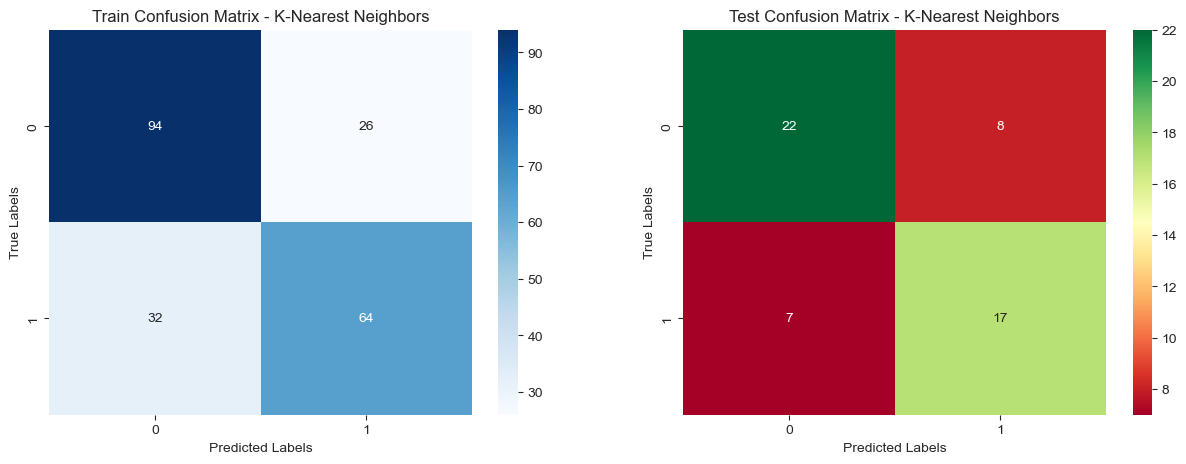

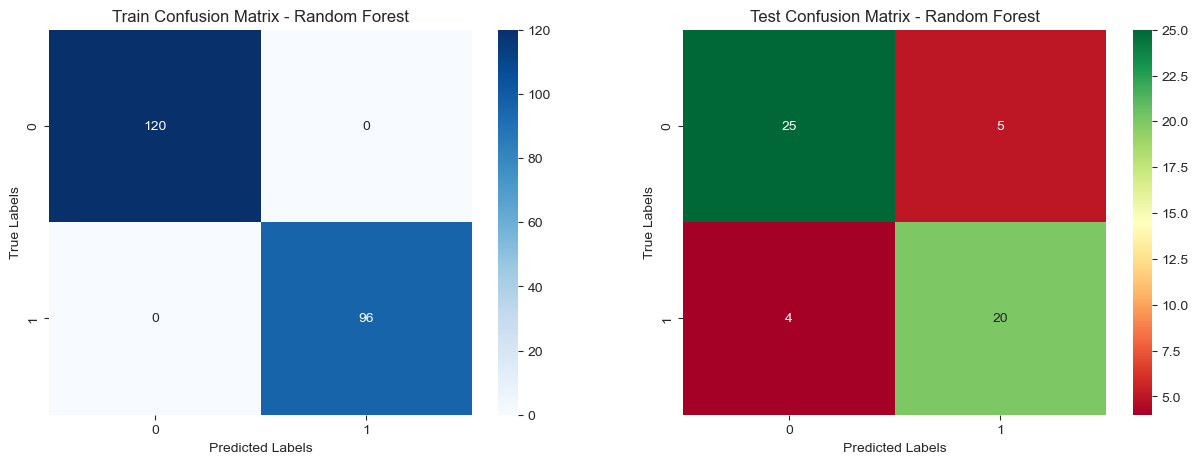

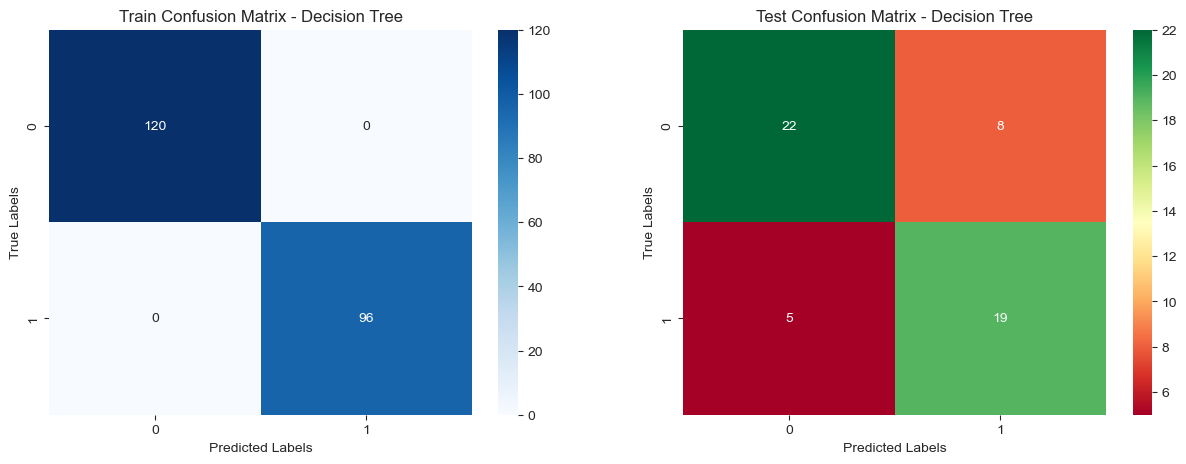

In [88]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_train_true, y_train_pred, y_test_true, y_test_pred, classifier_name):
    train_cm = confusion_matrix(y_train_true, y_train_pred)
    test_cm = confusion_matrix(y_test_true, y_test_pred)
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Train Confusion Matrix
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title(f'Train Confusion Matrix - {classifier_name}')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    
    # Test Confusion Matrix
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="RdYlGn", ax=axes[1])
    axes[1].set_title(f'Test Confusion Matrix - {classifier_name}')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')
    
    plt.show()

# Generate confusion matrix for each classifier
plot_confusion_matrix(y_train, kn.predict(X_train), y_test, kn.predict(X_test), "K-Nearest Neighbors")
plot_confusion_matrix(y_train, rf.predict(X_train), y_test, rf.predict(X_test), "Random Forest")
plot_confusion_matrix(y_train, dt.predict(X_train), y_test, dt.predict(X_test), "Decision Tree")

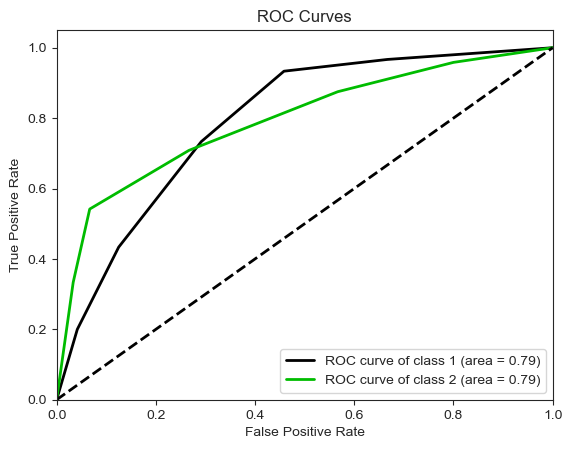

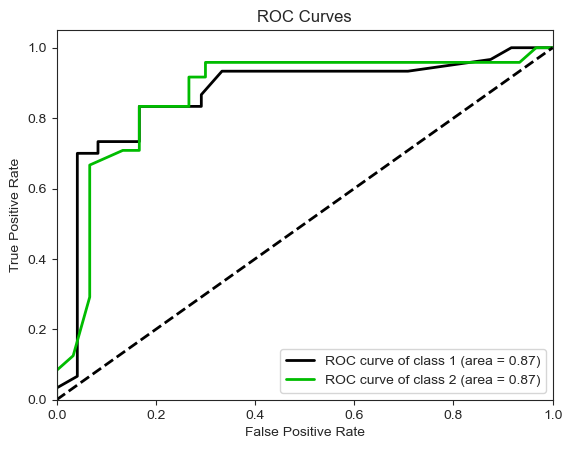

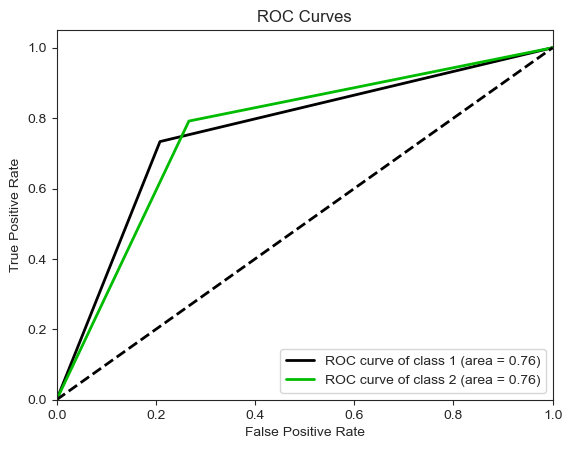

In [89]:
import scikitplot as skplt
y_probas = kn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show();
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show();
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
plt.show();

In [90]:
k = range(10, 30)
k

range(10, 30)